本文主要介绍了几种在数据展示时，常用的画图的方法

# ax画图常用的参数

fig,ax: 画板，用法：fig, ax = plt.subplots(figsize=(10, 5))

figsize: 表示图像大小的元组

sharex, sharey：x（y）轴共享，用法：sharex=True

title: 标题

legend: 添加图例，用法：ax.legend(['kind1','kind2'])

xticks，yticks: x(y)轴的显示备注，用法：ax.set_yticks('人数')

xticklabels: x轴标签内容，用法：ax.set_xticklabels(['kind1','kind2'])

xlim，ylim: x(y)轴刻度的上下限，用法 ax.set_xlim(0, 1)

fontsize: 字体大小

colormap: 颜色

alpha: 透明度

sort_columns: 按照字母顺序绘制，默认使用当前列顺序

grid: 轴网格线，默认打开

bins: 柱子的数量

# matplotlib中的常用图形

line: 线形图

bar: 垂直柱状图，stacked=True时是堆积柱状图

barh: 水平柱状图

kde: 核密度估计图

hist: 频率分布直方图

area: 面积图

# matplotlib画图
## 导入需要的包

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn
plt.rcParams['font.family']="Droid Sans Fallback"#显示中文字体
plt.rcParams['axes.unicode_minus'] = False#解决负号显示错误问题
from IPython.core.display import HTML,display

In [10]:
from pandas import DataFrame
df = DataFrame({'kind':['kind1','kind2','kind3'],'num1':[1,2,3],'num2':[0.4,0.5,0.6]})
df

,kind,num1,num2
0,kind1,1,0.4
1,kind2,2,0.5
2,kind3,3,0.6


## 柱状图

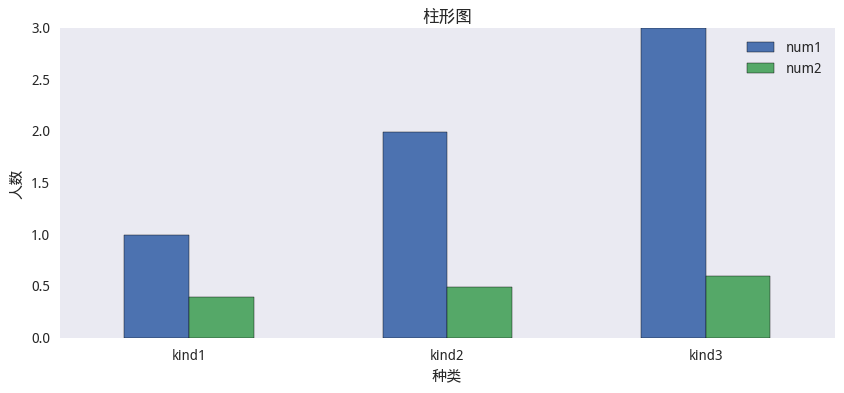

In [3]:
display(HTML('<h2>{col}</h2>'.format(col = '柱形图结果')))
ax=df.plot(kind='bar',figsize=(10,4),title='柱形图',grid=False);
ax.set_ylabel("人数");
ax.set_xlabel('种类');
x_labels=list(df['kind']);
ax.set_xticklabels(x_labels,rotation=0)#rotation为刻度旋转的角度;
# formatter = FuncFormatter(to_percent);
# ax.yaxis.set_major_formatter(formatter);
    
rects=ax.patches;
plt.show();
plt.close();

## 带数字的柱状图，并把值改成百分比显示

* 此处定义了一个函数，目的是将数字转化成百分比形式

In [4]:
def to_percent(y, position):
    s = str(100 * y)
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

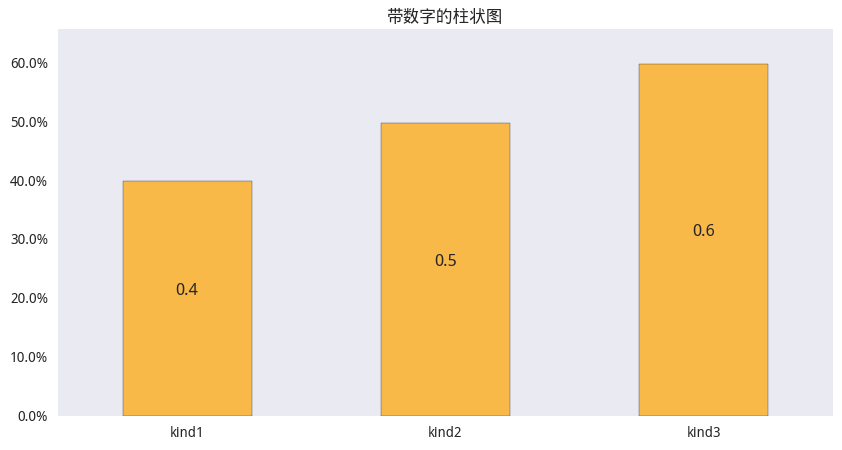

In [5]:
display(HTML('<h2>{col}</h2>'.format(col = '百分比柱状图结果')))
fig, ax = plt.subplots(figsize=(10, 5))
df['num2'].plot(kind='bar',title='带数字的柱状图',color='orange',alpha=0.7,grid=False)
x_labels = list(df['kind'])
ax.set_xticklabels(x_labels, rotation=0)
rects = ax.patches
labels = list(df['num2'])
for rect, label in zip(rects, labels):

    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/ 2, height/2, label, ha='center', va='bottom')
#可以设置y轴的上限，我这里设置为要画图的数据中的最大值+最大值/10    
yl = max(labels) + (max(labels) / 10)
plt.ylim(0, yl)

# y轴变成百分比
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show();
plt.close();

## 线形图

In [6]:
import numpy as np

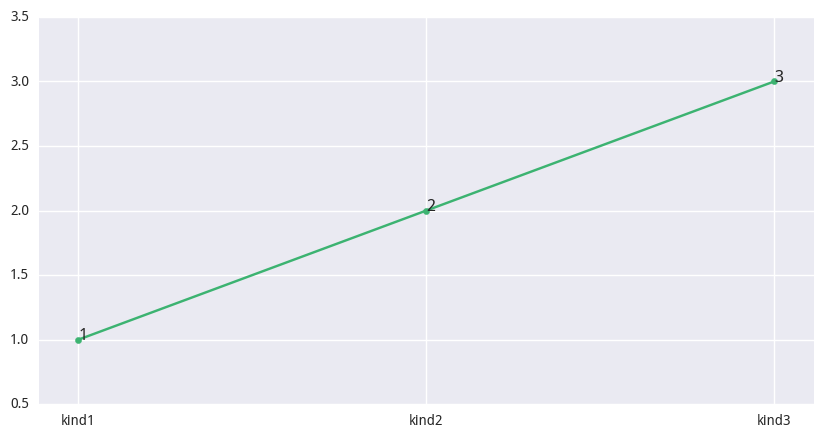

In [7]:
display(HTML('<h2>{col}</h2>'.format(col = '线形图结果')))
num = list(df['num1'])
lattice = list(np.arange(len(df)) + 1)
x_xticks_label = list(df['kind'])
fig, ax = plt.subplots(figsize=(10, 5))
plt.xticks(lattice, x_xticks_label)
ax.scatter(lattice, num, color='mediumseagreen')
ax.plot(lattice, num, color='mediumseagreen')
#此时图片已经画出来了，可以在相应为位置添加数字
for i, txt in enumerate(num):
    ax.annotate(txt, (lattice[i], num[i]))#括号中的参数为（要添加的数字，对应的x的位置，对应的y的位置）
plt.show();
plt.close();

## 两类占比对比柱形图
* True和False的值相加为1

In [8]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
sns.set(style="whitegrid")
from matplotlib.pyplot import plot, figure, rc
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "Droid Sans Fallback"
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.titlesize'] = 20

In [9]:
df = DataFrame({'kind':['a','b','c'],'False':[0.1,0.9,0.5],'True':[0.9,0.1,0.5]})[['kind','True','False']]
df

  kind  True  False
0    a   0.9    0.1
1    b   0.1    0.9
2    c   0.5    0.5


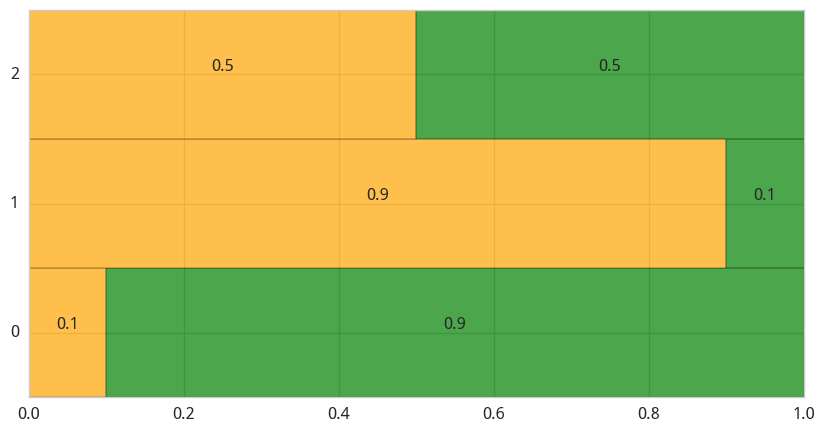

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
v_values = range(len(df)+1)

ax.set_yticks(v_values)
ax.set_ylim(0-1/2,len(df)-1/2)
ax.set_xlim(0, 1)

height=1
x = list(df['False'])
j=0

for i in x:        
    y=1-i
    
    plt.barh(bottom=j-height/2,width=i,height=height,color='orange',alpha=0.7)#alpha:透明度
    plt.barh(bottom=j-height/2,width=y,left=i,height=height,color='green',alpha=0.7)

    ax.text(i/2,j,i, ha='center', va='bottom')#先注明x显示的位置（x轴位置，y轴位置，要显示的值，...)
    ax.text(i+y/2,j,y, ha='center', va='bottom')

    j+=height

# ax.legend(['False','True']
plt.show();
plt.close();